## **PROYECTO MÓDULO 3: Optimización de Talento**

A partir de un CSV con datos de la empresa debemos tratar los datos siguiendo los siguientes pasos:
1. Averiguar por qué se han marchado las empleadas/os de la empresa.
2. Si queremos más información o pistas podemos preguntarle a Rocío
3. FASES: 
    1. Hacer un EDA
    2. Transformar los datos (limpieza de nulos, normalización, etc.)
    3. Visualización de datos (hacer gráficas en Python). 
    4. BONUS: Diseño de base de datos e insertar los datos en SQL. 
    5. BONUS: Creación de ETL, hacer funciones para automatizar el proceso. 
    6. Hacer una presentación:
        - **Introducción, objetivos, pasos y organización**
        - Parte central: **análisis de las gráficas, tablas...**
        - **¿Qué info podemos obtener de estos? ¿Consejos para la empresa? ¿Mejoras? ¿Encontramos correlación entre variables?**
        - **Retos y soluciones**
        - **Conclusiones**
4. Aplicar metodología Agile y Srum. **Rocío** va a ser la clienta final: **Product Owner**


### **FASE 1: EDA**

In [ ]:
#Importar librerías
import pandas as pd
import numpy as np 

In [2]:
#Configuración de la visualización del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Lectura del CSV y transformación a DataFrame (df)
df=pd.read_csv("HR RAW DATA.csv", index_col =0)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1614 non-null   object 
 1   Attrition                 1614 non-null   object 
 2   BusinessTravel            842 non-null    object 
 3   DailyRate                 1614 non-null   object 
 4   Department                302 non-null    object 
 5   DistanceFromHome          1614 non-null   int64  
 6   Education                 1614 non-null   int64  
 7   EducationField            869 non-null    object 
 8   employeecount             1614 non-null   int64  
 9   employeenumber            1183 non-null   object 
 10  EnvironmentSatisfaction   1614 non-null   int64  
 11  Gender                    1614 non-null   int64  
 12  HourlyRate                1614 non-null   object 
 13  JobInvolvement            1614 non-null   int64  
 14  JobLevel     

In [6]:
#Visualización de los valores distintos que hay en cada columna y su número de repeticiones
for column in df.columns:
    display(df[column].value_counts())

Age
35              84
34              83
31              82
29              78
36              74
32              64
38              64
30              63
33              61
40              60
27              54
37              53
28              53
42              50
45              48
41              46
26              45
39              45
43              40
46              38
44              34
50              31
25              27
24              26
47              26
49              25
55              24
54              20
51              20
53              20
48              20
52              18
56              17
21              16
22              16
23              15
58              14
20              11
59              10
19               9
18               8
60               5
57               5
thirty-two       2
fifty-eight      1
twenty-six       1
thirty-seven     1
thirty-one       1
thirty           1
fifty-two        1
fifty-five       1
thirty-six       1
forty-se

Attrition
No     1355
Yes     259
Name: count, dtype: int64

BusinessTravel
travel_rarely        586
travel_frequently    165
non-travel            91
Name: count, dtype: int64

DailyRate
nan$       124
691,0$       7
329,0$       7
147,0$       6
530,0$       6
408,0$       6
827,0$       5
1329,0$      5
1082,0$      5
427,0$       5
688,0$       5
1283,0$      5
1157,0$      5
950,0$       5
334,0$       5
906,0$       5
1003,0$      4
829,0$       4
1018,0$      4
430,0$       4
1225,0$      4
1229,0$      4
933,0$       4
1490,0$      4
1099,0$      4
977,0$       4
465,0$       4
715,0$       4
921,0$       4
303,0$       4
1092,0$      4
1469,0$      4
217,0$       4
482,0$       4
793,0$       4
661,0$       4
240,0$       4
501,0$       4
654,0$       4
1276,0$      4
703,0$       4
201,0$       4
1107,0$      4
805,0$       4
895,0$       4
1180,0$      4
589,0$       4
575,0$       4
1485,0$      4
603,0$       3
890,0$       3
218,0$       3
1169,0$      3
722,0$       3
1219,0$      3
1097,0$      3
528,0$       3
1396,0$      3
419,0$       3
1277,0$      3
685,0$       3
852,0$       3
991,0$       3
1184,0$      3
1089,0$      3
1199,0$      3


Department
Research & Development     196
Sales                       91
Human Resources             15
Name: count, dtype: int64

DistanceFromHome
 2     217
 1     203
 10     86
 9      85
 8      81
 7      80
 3      79
 5      62
 6      61
 4      61
 16     30
 11     28
 15     27
 23     26
 29     25
 25     24
 24     24
 18     22
 26     22
 14     21
 12     21
 21     19
 17     19
 13     19
 20     18
 28     17
 22     16
 19     16
 27     13
-13     11
-12     11
-24     11
-18      8
-47      7
-35      7
-38      7
-19      6
-36      6
-14      6
-31      6
-26      6
-25      6
-42      6
-22      5
-45      5
-48      5
-10      5
-46      5
-16      5
-27      4
-30      4
-20      4
-29      4
-41      4
-32      4
-37      4
-17      3
-11      3
-15      3
-23      3
-33      3
-44      3
-21      2
-49      2
-28      2
-34      2
-43      2
-39      1
-40      1
Name: count, dtype: int64

Education
3    621
4    445
2    314
1    180
5     54
Name: count, dtype: int64

EducationField
Life Sciences       349
Medical             276
Marketing           104
Technical Degree     69
Other                59
Human Resources      12
Name: count, dtype: int64

employeecount
1    1614
Name: count, dtype: int64

employeenumber
482,0     2
530,0     2
507,0     2
517,0     2
522,0     2
523,0     2
525,0     2
526,0     2
544,0     2
501,0     2
725,0     2
724,0     2
722,0     2
721,0     2
717,0     2
710,0     2
502,0     2
495,0     2
747,0     2
440,0     2
734,0     2
733,0     2
728,0     2
423,0     2
424,0     2
433,0     2
447,0     2
1140,0    2
455,0     2
460,0     2
465,0     2
470,0     2
475,0     2
478,0     2
682,0     2
663,0     2
653,0     2
1069,0    2
389,0     2
388,0     2
381,0     2
376,0     2
1044,0    2
1053,0    2
1195,0    2
621,0     2
1185,0    2
1162,0    2
1161,0    2
1160,0    2
1157,0    2
1131,0    2
401,0     2
416,0     2
430,0     2
438,0     2
446,0     2
448,0     2
454,0     2
458,0     2
476,0     2
483,0     2
488,0     2
500,0     2
534,0     2
586,0     2
595,0     2
608,0     2
616,0     2
742,0     2
1135,0    2
762,0     2
1849,0    2
972,0     2
990,0     2
1927,0    2
1911,0    2
1898,0    2
1869,0    2
1821,0    2
966,0     2
1816,0    2
1

EnvironmentSatisfaction
4     460
3     459
1     298
2     297
12      7
35      6
13      6
14      5
24      5
47      5
36      4
48      4
41      4
46      4
42      4
45      3
11      3
22      3
17      3
18      3
20      3
25      3
27      3
37      2
29      2
19      2
38      2
31      2
15      2
16      2
26      1
39      1
10      1
49      1
21      1
28      1
33      1
43      1
Name: count, dtype: int64

Gender
0    971
1    643
Name: count, dtype: int64

HourlyRate
Not Available    84
42               33
66               32
48               30
57               29
84               29
54               28
46               28
98               28
87               27
72               27
96               27
92               27
32               26
56               26
79               26
86               25
81               25
52               25
61               25
62               24
83               24
51               24
82               24
43               23
74               23
88               23
45               23
41               23
77               23
73               23
94               23
60               22
78               22
95               22
99               21
76               21
80               21
59               21
67               21
91               20
97               20
75               20
90               20
85               20
44               20
49               20
64               19
55               19
65       

JobInvolvement
3    955
2    406
4    164
1     89
Name: count, dtype: int64

JobLevel
2    597
1    586
3    242
4    113
5     76
Name: count, dtype: int64

JobRole
mANager                       4
ManageR                       3
ManagEr                       3
mAnaGeR                       3
MANAgER                       3
mAnageR                       3
MAnagEr                       2
maNaGeR                       2
mAnAGer                       2
MAnagER                       2
mANAgER                       2
MaNAgeR                       2
RESeArCh SCIEntiSt            2
ManAgEr                       2
MAnAGeR                       2
MaNaGer                       2
manAger                       2
MaNagEr                       2
MAnager                       2
MANagER                       2
ManAGEr                       2
MAnAgeR                       2
MAnAgER                       2
MaNagER                       2
MANAGER                       2
sALeS EXecuTIVe               2
manAGER                       2
SaLES eXeCUtIVE               2
MaNuFaCTuring dIRECTOr        1
ManUFaCTuRiNg dIRECTOR        1
reSEArcH sCiENTisT            1


JobSatisfaction
4    514
3    481
1    317
2    302
Name: count, dtype: int64

MaritalStatus
Married     404
Single      325
Divorced    188
Marreid      35
divorced     11
Name: count, dtype: int64

MonthlyIncome
6347,0     4
5304,0     4
2657,0     3
2258,0     3
5405,0     2
8224,0     2
2610,0     2
5731,0     2
2539,0     2
2376,0     2
11713,0    2
2216,0     2
19189,0    2
3452,0     2
2070,0     2
8793,0     2
2587,0     2
4960,0     2
11159,0    2
5396,0     2
2782,0     2
4197,0     2
9434,0     2
5337,0     2
2741,0     2
2791,0     2
5828,0     2
2909,0     2
2033,0     2
2821,0     2
7756,0     2
2042,0     2
6632,0     2
7587,0     2
4335,0     2
5980,0     2
4244,0     2
5228,0     2
2700,0     2
2380,0     2
2404,0     2
2377,0     2
2366,0     2
2329,0     2
4294,0     2
6725,0     2
10325,0    2
4447,0     2
10845,0    2
3420,0     2
4805,0     2
17861,0    2
5605,0     2
6162,0     2
6410,0     2
13212,0    2
3034,0     2
5974,0     2
2119,0     2
2144,0     2
5373,0     2
5257,0     2
4682,0     2
5769,0     2
3539,0     2
5468,0     2
5813,0     2
9667,0     2
5154,0     2
5675,0     2
7314,0     2
5055,0     2
2455,0     2
4941,0     2
3983,0     2
2904,0     

MonthlyRate
9150     4
11737    3
17001    3
6069     3
21981    3
9558     3
25326    3
19373    3
4223     3
4156     3
20898    2
7508     2
3698     2
17725    2
21519    2
23779    2
11148    2
2125     2
23361    2
9396     2
16225    2
9931     2
26085    2
25549    2
14229    2
12388    2
20420    2
25275    2
9655     2
2227     2
16193    2
3872     2
24737    2
16375    2
2755     2
7621     2
23177    2
16092    2
24017    2
2967     2
2851     2
7551     2
5355     2
18168    2
17881    2
12066    2
11868    2
4652     2
5915     2
20490    2
8509     2
12740    2
15238    2
20335    2
11825    2
19562    2
19566    2
26914    2
14862    2
22495    2
12858    2
20156    2
11866    2
3415     2
4759     2
6227     2
4317     2
10557    2
16154    2
7143     2
10675    2
12241    2
8450     2
15972    2
20260    2
19100    2
10268    2
7501     2
18256    2
26314    2
4809     2
7181     2
7747     2
15891    2
6670     2
6009     2
19383    2
21703    2
20978    2
17654    

NUMCOMPANIESWORKED
1    573
0    226
3    169
4    157
2    156
7     84
6     73
5     66
9     59
8     51
Name: count, dtype: int64

Over18
Y    713
Name: count, dtype: int64

OverTime
No     682
Yes    256
Name: count, dtype: int64

PercentSalaryHike
11    232
13    230
12    225
14    220
15    110
18     98
17     88
16     86
19     82
20     60
22     59
21     51
23     29
24     25
25     19
Name: count, dtype: int64

PerformanceRating
3,0    1205
4,0     214
Name: count, dtype: int64

RelationshipSatisfaction
3    504
4    468
2    339
1    303
Name: count, dtype: int64

StandardHours
80,0    419
Name: count, dtype: int64

StockOptionLevel
0    687
1    666
2    172
3     89
Name: count, dtype: int64

TOTALWORKINGYEARS
10,0    144
8,0      86
6,0      84
9,0      69
5,0      66
7,0      56
4,0      54
1,0      53
12,0     34
3,0      32
14,0     30
13,0     30
11,0     29
15,0     28
16,0     28
20,0     28
18,0     27
21,0     23
17,0     22
2,0      21
22,0     18
19,0     17
24,0     14
23,0     13
28,0     13
26,0      8
0,0       8
29,0      6
36,0      6
25,0      6
33,0      6
37,0      5
27,0      5
31,0      4
30,0      3
32,0      3
35,0      3
40,0      3
34,0      2
38,0      1
Name: count, dtype: int64

TrainingTimesLastYear
2    598
3    534
4    137
5    136
1     77
6     72
0     60
Name: count, dtype: int64

WORKLIFEBALANCE
3,0    913
2,0    359
4,0    155
1,0     79
Name: count, dtype: int64

YearsAtCompany
5     208
1     171
3     141
2     141
10    133
7     115
4     114
8     106
9      94
6      78
0      44
11     36
20     29
13     26
15     21
14     19
22     17
12     15
18     15
16     14
21     14
19     12
17      9
24      7
25      5
33      5
26      4
32      3
27      3
31      3
36      3
29      2
23      2
40      2
34      1
37      1
30      1
Name: count, dtype: int64

YearsInCurrentRole
2,0     11
7,0      5
0,0      4
4,0      3
1,0      3
11,0     2
6,0      2
3,0      2
13,0     1
12,0     1
Name: count, dtype: int64

YearsSinceLastPromotion
0     625
1     384
2     177
7      93
4      67
3      62
5      53
6      37
11     26
8      20
9      18
15     15
12     11
13     10
14     10
10      6
Name: count, dtype: int64

YEARSWITHCURRMANAGER
2     380
0     270
7     267
3     148
8     115
4     104
1      84
9      70
5      36
10     31
6      30
11     22
12     20
13     16
17      8
15      5
14      5
16      3
Name: count, dtype: int64

SameAsMonthlyIncome
6347,0     4
5304,0     4
2657,0     3
2258,0     3
5405,0     2
8224,0     2
2610,0     2
5731,0     2
2539,0     2
2376,0     2
11713,0    2
2216,0     2
19189,0    2
3452,0     2
2070,0     2
8793,0     2
2587,0     2
4960,0     2
11159,0    2
5396,0     2
2782,0     2
4197,0     2
9434,0     2
5337,0     2
2741,0     2
2791,0     2
5828,0     2
2909,0     2
2033,0     2
2821,0     2
7756,0     2
2042,0     2
6632,0     2
7587,0     2
4335,0     2
5980,0     2
4244,0     2
5228,0     2
2700,0     2
2380,0     2
2404,0     2
2377,0     2
2366,0     2
2329,0     2
4294,0     2
6725,0     2
10325,0    2
4447,0     2
10845,0    2
3420,0     2
4805,0     2
17861,0    2
5605,0     2
6162,0     2
6410,0     2
13212,0    2
3034,0     2
5974,0     2
2119,0     2
2144,0     2
5373,0     2
5257,0     2
4682,0     2
5769,0     2
3539,0     2
5468,0     2
5813,0     2
9667,0     2
5154,0     2
5675,0     2
7314,0     2
5055,0     2
2455,0     2
4941,0     2
3983,0     2
2904,

DateBirth
1988    84
1992    83
1989    83
1994    78
1987    75
1991    65
1985    64
1993    64
1990    61
1983    60
1986    55
1996    54
1995    53
1981    50
1978    48
1982    46
1997    46
1984    45
1980    40
1977    38
1979    34
1973    31
1999    27
1976    27
1998    27
1968    25
1974    25
1969    20
1972    20
1970    20
1975    20
1971    19
1967    17
2001    16
2002    16
1965    15
2000    15
2003    11
1964    10
2004     9
2005     8
1963     5
1966     5
Name: count, dtype: int64

Salary
1000000000$    1614
Name: count, dtype: int64

RoleDepartament
MaNAgeR  -  Sales                                        2
ManaGER  -  Research & Development                       1
ReseaRch scIENTisT  -  Research & Development            1
ManufacTURInG DIRECtOR  -  Research & Development        1
hEalthCaRe reprEseNTaTiVe  -  Research & Development     1
SAlES exeCutive  -  Sales                                1
labORAtoRy tEcHNICIAN  -  Research & Development         1
rEsEaRCh diReCtOR  -  Research & Development             1
lAboRaToRY teChNICIan  -  Research & Development         1
researCh SCientIsT  -  Research & Development            1
ResEArch sCIEnTiST  -  Research & Development            1
ReSEarch scIeNTIsT  -  Research & Development            1
laBoRatoRy TEChNICiAN  -  Research & Development         1
sALES ReprEsentatiVE  -  Sales                           1
laBOraTOrY TecHNIcIan  -  Research & Development         1
mANufActuRIng DirECTOR  -  Research & Development        1
hEaLThcARE rEpresEntATiVE  -  Research &

Series([], Name: count, dtype: int64)

RemoteWork
1        360
True     345
0        309
False    305
Yes      295
Name: count, dtype: int64

In [7]:
#Exploratory Data Analysis (EDA):
# Examinar y visualizar los datos de manera sistemática con el objetivo de descubrir patrones,
# identificar tendencias, detectar valores atípicos y extraer información relevante.

def eda_basico(df):
    print("🔍 Primeras filas del DataFrame:")
    display(df.head())
    print("📐 Dimensiones:")
    print(df.shape , "\n")
    print("🧠 Información general:")
    display(df.info())
    print('🌑Nombre de las columnas:')
    display(df.columns)
    print("📊 Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print("📉 Descripción de columnas numéricas:")
    display(df.describe())
    print("🔤 Descripción de columnas categóricas:")
    display(df.describe(include=['O']))
    print("🚫 Valores nulos por columna:")
    display(df.isnull().sum())
    print("📎 Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Duplicadas: {dup_count}")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")

In [8]:
eda_basico(df)

🔍 Primeras filas del DataFrame:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


📐 Dimensiones:
(1614, 41) 

🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1614 non-null   object 
 1   Attrition                 1614 non-null   object 
 2   BusinessTravel            842 non-null    object 
 3   DailyRate                 1614 non-null   object 
 4   Department                302 non-null    object 
 5   DistanceFromHome          1614 non-null   int64  
 6   Education                 1614 non-null   int64  
 7   EducationField            869 non-null    object 
 8   employeecount             1614 non-null   int64  
 9   employeenumber            1183 non-null   object 
 10  EnvironmentSatisfaction   1614 non-null   int64  
 11  Gender                    1614 non-null   int64  
 12  HourlyRate                1614 non-null   object 
 13  JobInvolvement   

None

🌑Nombre de las columnas:


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

📊 Tipos de datos por columna:
Age                          object
Attrition                    object
BusinessTravel               object
DailyRate                    object
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
employeecount                 int64
employeenumber               object
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                   object
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                   int64
NUMCOMPANIESWORKED            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating            object
RelationshipSatisfaction      int64
StandardHours                objec

,DistanceFromHome,Education,employeecount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NUMCOMPANIESWORKED,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,NUMBERCHILDREN
count,1614.000000,1614.000000,1614.0,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,0.0
mean,4.527261,2.925031,1.0,4.294919,0.398389,2.739777,2.068154,2.738538,14284.495663,2.673482,15.165428,2.704461,0.791202,2.809789,7.132590,2.245973,4.220570,1986.076208,NaN
std,14.591913,1.022357,0.0,6.993559,0.489718,0.711567,1.101344,1.106163,7110.414585,2.506152,3.648610,1.079031,0.842396,1.297765,6.124237,3.235665,3.562695,9.101332,NaN
min,-49.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1963.000000,NaN
25%,2.000000,2.000000,1.0,2.000000,0.000000,2.000000,1.000000,2.000000,8001.000000,1.000000,12.000000,2.000000,0.000000,2.000000,3.000000,0.000000,2.000000,1980.000000,NaN
50%,5.000000,3.000000,1.0,3.000000,0.000000,3.000000,2.000000,3.000000,14248.500000,2.000000,14.000000,3.000000,1.000000,3.000000,5.000000,1.000000,3.000000,1987.000000,NaN
75%,11.000000,4.000000,1.0,4.000000,1.000000,3.000000,3.000000,4.000000,20364.000000,4.000000,18.000000,4.000000,1.000000,3.000000,9.000000,3.000000,7.000000,1993.000000,NaN
max,29.000000,5.000000,1.0,49.000000,1.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,6.000000,40.000000,15.000000,17.000000,2005.000000,NaN


🔤 Descripción de columnas categóricas:


,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,employeenumber,HourlyRate,JobRole,MaritalStatus,MonthlyIncome,Over18,OverTime,PerformanceRating,StandardHours,TOTALWORKINGYEARS,WORKLIFEBALANCE,YearsInCurrentRole,SameAsMonthlyIncome,Salary,RoleDepartament,RemoteWork
count,1614,1614,842,1614,302,869,1183,1614,1614,963,771,713,938,1419,419,1088,1506,34,771,1614,302,1614
unique,54,2,3,849,3,6,1079,72,1579,5,668,1,2,2,1,40,4,10,668,1,301,5
top,35,No,travel_rarely,nan$,Research & Development,Life Sciences,"482,0",Not Available,mANager,Married,"6347,0",Y,No,"3,0","80,0","10,0","3,0","2,0","6347,0",1000000000$,MaNAgeR - Sales,1
freq,84,1355,586,124,196,349,2,84,4,404,4,713,682,1205,419,144,913,11,4,1614,2,360


🚫 Valores nulos por columna:


Age                            0
Attrition                      0
BusinessTravel               772
DailyRate                      0
Department                  1312
DistanceFromHome               0
Education                      0
EducationField               745
employeecount                  0
employeenumber               431
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                651
MonthlyIncome                843
MonthlyRate                    0
NUMCOMPANIESWORKED             0
Over18                       901
OverTime                     676
PercentSalaryHike              0
PerformanceRating            195
RelationshipSatisfaction       0
StandardHours               1195
StockOptionLevel               0
TOTALWORKINGYEARS            526
TrainingTimesLastYear          0
WORKLIFEBA

📎 Filas duplicadas:
Duplicadas: 0
No hay filas duplicadas.



**Acciones pendientes:** 

1. Corregir los encabezados de las columnas (ponerlos en castellano, en minúsculas y sin espacios)
2. Eliminar las columnas innecesarias
3. Corregir el contenido de las filas (minúsculas, sin espacios, símbolos, etc.)(CREAR UNA FUNCIÓN)
    - La edad está en letra y debería estar en número
    - La columna de teletrabajo tiene datos en distintos formatos. 
    - Cuando aparecen cifras de 2 dígitos, la correcta es la primera. 
4. Poner bien los dtypes de las columnas (int,float, object...)

IMPORTANTE! Al finalizar guardar el csv modificado. 

<u>Tabla resumen: </u>

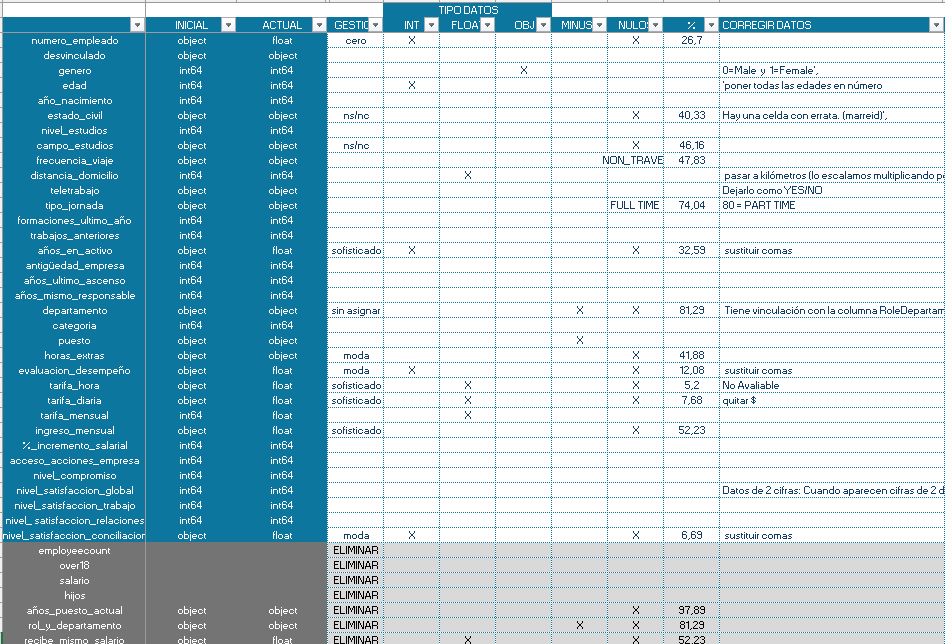